In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import modules, read the csv file and print the first 10 rows.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('/content/drive/MyDrive/TechProAcademyProject/adjusted_retail_sales_data_v2.csv')
df

,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings
0,2023-10-15,Home Appliances,609,22,Male,USA,4
1,2023-09-16,Clothing,1367,22,Female,Australia,5
2,2022-09-06,Electronics,1736,22,Male,UK,2
3,2023-02-24,Female,1838,35,Clothing,India,2
4,2022-09-24,Home Appliances,1829,35,Male,UK,5
...,...,...,...,...,...,...,...
995,2023-12-02,Clothing,801,22,Male,Australia,3
996,2023-02-02,Home Appliances,1148,35,Female,Canada,5
997,2023-07-30,Home Appliances,144,22,Female,Canada,2
998,2023-01-05,Electronics,1688,22,Male,USA,3


# **Analysis Goals**
## Data Cleaning and Preparation
### Check for null values and the dtype of every column


In [26]:
# Check if the dataset has null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SalesDate         1000 non-null   object
 1   ProductCategory   1000 non-null   object
 2   SalesAmount       1000 non-null   object
 3   CustomerAge       1000 non-null   int64 
 4   CustomerGender    1000 non-null   object
 5   CustomerLocation  998 non-null    object
 6   ProductRatings    1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


### Find duplicates.


In [27]:
# Check for duplitcates
print(f"The duplicated rows are: {df.duplicated().sum()} \n")

The duplicated rows are: 0 



## We must change the type of the data in some columns.
#### The SalesDate column must be in date time format.
#### The SalesAmount column must be integers. In this column we detect some characters like '-' or '%'. First of all we remove this characters and then we convert the values to integers.  

In [28]:
# The 'SalesDate' column has object values, we want datetime format.
df['SalesDate'] = pd.to_datetime(df['SalesDate'],format = '%y-%m-%d',infer_datetime_format = True)
print(f'The values in SalesDate column is: {df["SalesDate"].dtype}\n')



# The 'SalesAmount' column has object values, we want integers.
# Also some raws has charactes like '-' or '%'
# We remove all the non-digit characters from this column
df['SalesAmount'] = df['SalesAmount'].str.replace(r'\D', '', regex=True)

# Change the dtype to integers
df['SalesAmount'] = pd.to_numeric(df['SalesAmount'],downcast='integer')
print(f'The values in SalesAmount column is: {df["SalesAmount"].dtype}')

The values in SalesDate column is: datetime64[ns]

The values in SalesAmount column is: int32


<ipython-input-28-0fd446f0795a>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['SalesDate'] = pd.to_datetime(df['SalesDate'],format = '%y-%m-%d',infer_datetime_format = True)


### Return the unique values from the ProductCategory and CustomerGender columns.


In [29]:
# Give me the unique values of the column ProductCategory and CustomerGender.
print(df['ProductCategory'].unique(),'\n')
print(df['CustomerGender'].unique())

['Home Appliances' 'Clothing' 'Electronics' 'Female'] 

['Male' 'Female' 'Clothing' 'Unknown' 'Did not answer' 'Non-binary']


#### We can see that the Product Category and Customer Gender has illegal values
####'Female' is not allowed to Product Category and 'Clothing' is not allowed to CustomerGender.
#### Let's detect the rοw where the ProductCategory Values is 'Female'

In [30]:
# The column 'ProductCategory' has the value 'Female'. Find the row
incosistent_data = df[df['ProductCategory'] == 'Female'].index
print(f"The incosistent data is in {incosistent_data[0]}rd raw. ")

The incosistent data is in 3rd raw. 


#### We can notice that in the third row of the dataset are incosistent. We also notice that we can swap the values in ProductCategory and CustomerGender column.
#### Also we drop the rows where the values in CustomerGender is 'Unknown' and 'Did not Answer'.

In [31]:
# The 'CustomerGender' column has the value 'Clothing' and the 'ProductCategory' column has the balue 'Female'
# We Change this values to correct position.
df['CustomerGender'].loc[3], df['ProductCategory'].loc[3] = df['ProductCategory'].loc[3], df['CustomerGender'].loc[3]

print(df.iloc[3])

# Drop the columns with values Unknown and Did not answer in Customer Gender column.
# Values to drop
values_to_drop = ['Unknown', 'Did not answer']

# Drop rows where 'CustomerGender' column has values from values_to_drop list.
df = df[~df['CustomerGender'].isin(values_to_drop)]

SalesDate           2023-02-24 00:00:00
ProductCategory                Clothing
SalesAmount                        1838
CustomerAge                          35
CustomerGender                   Female
CustomerLocation                  India
ProductRatings                        2
Name: 3, dtype: object


<ipython-input-31-64e7fceef801>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerGender'].loc[3], df['ProductCategory'].loc[3] = df['ProductCategory'].loc[3], df['CustomerGender'].loc[3]


#### The ProductRatings column must be in text format.
#### We can easily detect that this column has numbers but in string format. In two columns the values are numbers 'one' or 'two'
#### We detect them and change it to string. Also we have some incosistent data, some values are 10 but the maximum value must be 5. We drop those rows.

In [32]:
# Give me the unique values of the 'ProductRatings' column.
print(f"The unique values of the column is: {df['ProductRatings'].unique()}")

# List of allowed values.
allowed_values = ['1','2','3','4','5']

df = df[df['ProductRatings'].isin(allowed_values)]

# Give me the unique values of the 'ProductRatings' column.
print(f"The unique values of the column is: {df['ProductRatings'].unique()}")

The unique values of the column is: ['4' '5' '2' '3' '10' '1' 'two' 'one']
The unique values of the column is: ['4' '5' '2' '3' '1']


#### In the CustomerLocation column we have some countries. If we detect another country we drop the row.

In [33]:
# List of all the available locations.
Available_locations = ['Japan','Australia', 'India','USA', 'UK', 'Canada']
# Check if the locations are in the CustomerLocation column
result = df['CustomerLocation'].isin(Available_locations)
# Count the true values.
print(result.sum())

# Now Check for the uniqur values of the CustomerLocation column.
print(df['CustomerLocation'].unique())

# We have some nan values.Drop these rows.
df.dropna(inplace = True)

971
['USA' 'Australia' 'UK' 'India' 'Canada' 'Japan' nan]


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SalesDate         971 non-null    datetime64[ns]
 1   ProductCategory   971 non-null    object        
 2   SalesAmount       971 non-null    int32         
 3   CustomerAge       971 non-null    int64         
 4   CustomerGender    971 non-null    object        
 5   CustomerLocation  971 non-null    object        
 6   ProductRatings    971 non-null    object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(4)
memory usage: 56.9+ KB


### Check for outliers in CustomerAge and SalesAmount columns by creating boxplots

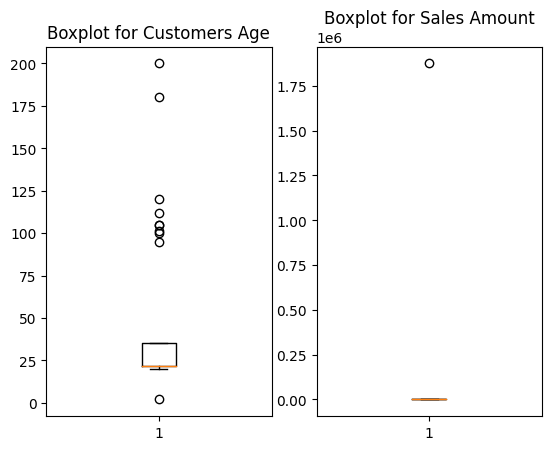

In [35]:
# Check for outliers in CustomersAge and SalesAmount
plt.subplot(1,2,1)
plt.boxplot(df['CustomerAge'])
plt.title('Boxplot for Customers Age')

plt.subplot(1,2,2)
plt.boxplot(df['SalesAmount'])
plt.title("Boxplot for Sales Amount")

plt.show()

### We notice that the CustomerAge has many oultiers. We detect one oultlier to the SalesAmount column.
#### Apply z-score to detect those oultliers.
##### First of all we define a threshold. The we create a python function and detect all the outliers. The function returns all the possible outliers.
##### Apply the function to the CustomerAge and SalesAmount column. Print the number of outliers in every column and the drop those rows.

In [36]:
threshold = 3
def detect_outliers(column):
  # Calculate z score
  zscore = np.abs((column - column.mean())/ column.std())
  # detect outliers based on threshold
  sucpicious_records = df [ zscore > threshold]
  outliers = df.index.isin(sucpicious_records.index)
  return outliers

# Find the oultiers in Customer Age column
CustomersAge_outliers = detect_outliers(df['CustomerAge'])
print(f'How many outlier you detect in the CustomerAge column: {CustomersAge_outliers.sum()}')
# Drop the outliers.
df = df[~CustomersAge_outliers]

# Find the outliers in Sales Amount column
SalesAmount_outliers = detect_outliers(df['SalesAmount'])
print(f'How many outlier you detect in the SalesAmount column:{SalesAmount_outliers.sum()}')
# Drop the outliers
df = df[~SalesAmount_outliers]

df

How many outlier you detect in the CustomerAge column: 9
How many outlier you detect in the SalesAmount column:1


,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings
0,2023-10-15,Home Appliances,609,22,Male,USA,4
1,2023-09-16,Clothing,1367,22,Female,Australia,5
2,2022-09-06,Electronics,1736,22,Male,UK,2
3,2023-02-24,Clothing,1838,35,Female,India,2
4,2022-09-24,Home Appliances,1829,35,Male,UK,5
...,...,...,...,...,...,...,...
995,2023-12-02,Clothing,801,22,Male,Australia,3
996,2023-02-02,Home Appliances,1148,35,Female,Canada,5
997,2023-07-30,Home Appliances,144,22,Female,Canada,2
998,2023-01-05,Electronics,1688,22,Male,USA,3


### Finally we want CustomerAge column to be in text format.

In [37]:
df['CustomerAge'] = df['CustomerAge'].astype(str)

df.dtypes

SalesDate           datetime64[ns]
ProductCategory             object
SalesAmount                  int32
CustomerAge                 object
CustomerGender              object
CustomerLocation            object
ProductRatings              object
dtype: object

### Export the cleaned data frame to use it again.

In [38]:
# Export dataFrame and Use the latet.
from pathlib import Path

# Specify the data types before exporting
dtypes = df.dtypes.astype(str).to_dict()

# Specify the file path
filepath = Path('/content/drive/MyDrive/TechProAcademyProject/Cleaned_data.csv')

# Export the DataFrame to a pickle file
df.to_pickle(filepath)


# Display the data types
print(df.dtypes)

SalesDate           datetime64[ns]
ProductCategory             object
SalesAmount                  int32
CustomerAge                 object
CustomerGender              object
CustomerLocation            object
ProductRatings              object
dtype: object
